In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv(r'C:\Users\T2C\train.csv', encoding='ISO-8859-1')

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\T2C\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [13]:
for column in df.columns:
    df[column] = df[column].astype(str)

In [14]:
df['word_count'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

# Text Preprocessing:
First, you should make sure that your text data is cleaned and prepared for sentiment analysis. Here are some common preprocessing steps:

In [16]:
import nltk

# Downloaded the stopwords corpus
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\T2C\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [18]:
# text' is the column we have to work with
df['text'] = df['text'].astype(str)

In [19]:
# Text Preprocessing
df['text'] = df['text'].str.lower()  # Convert text to lowercase
df['text'] = df['text'].str.replace('[^\w\s]', '')  # Remove punctuation

# Tokenization
df['text'] = df['text'].apply(nltk.word_tokenize)

# Removing Stop Words
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda words: [word for word in words if word not in stop_words])

# Sentiment Analysis:
For sentiment analysis, you can use TextBlob, which is a simple and easy-to-use library for sentiment analysis. 

Here's how to 
calculate sentiment scores:

In [21]:
# Converted the list of tokens to a single string
df['text'] = df['text'].apply(lambda tokens: ' '.join(tokens))

# Calculated sentiment polarity for each text entry
df['sentiment_score'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Data Visualization:
We can create various visualizations to explore your data. 
For example, to visualize the distribution of sentiments with a bar chart:

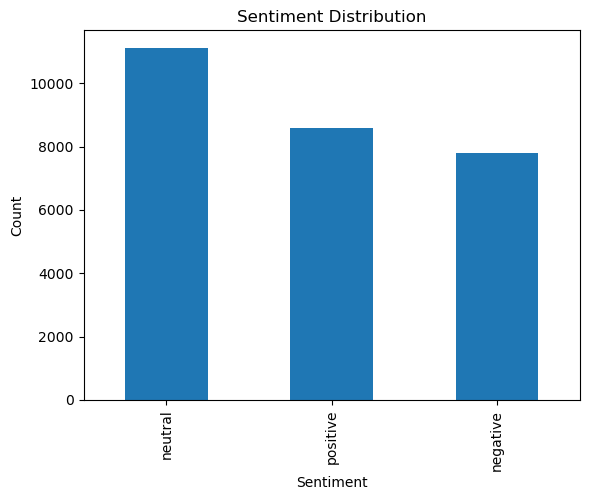

In [22]:
# Created a bar chart to show the distribution of sentiments
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# 1.Compared Sentiment with 'Time of Tweet':

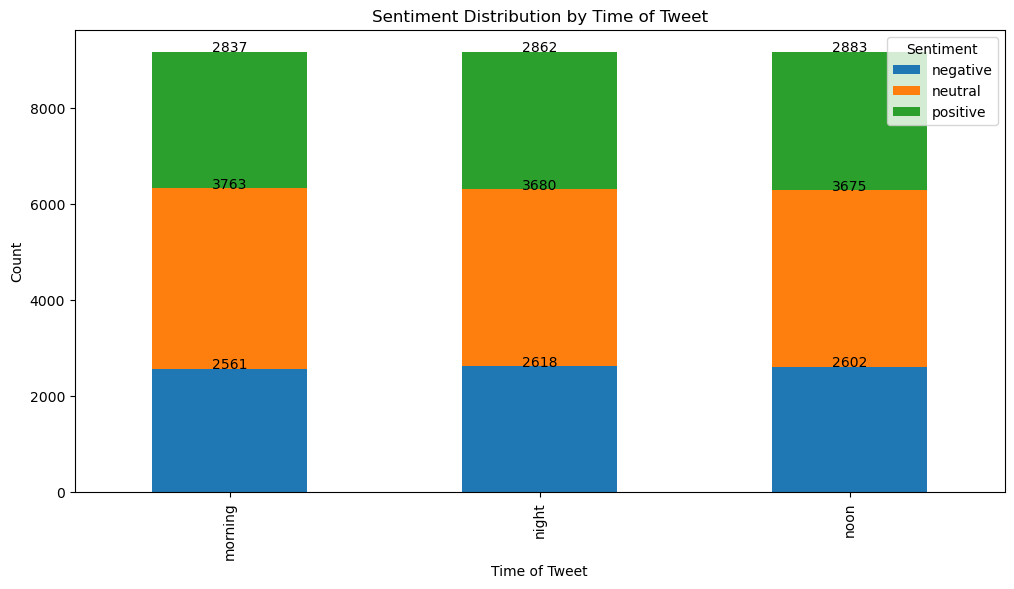

In [27]:
# Grouped the data by 'Time of Tweet' and 'sentiment'
sentiment_by_time = df.groupby(['Time of Tweet', 'sentiment']).size().unstack(fill_value=0)

# Plotted the stacked bar chart
ax = sentiment_by_time.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sentiment Distribution by Time of Tweet')
plt.xlabel('Time of Tweet')
plt.ylabel('Count')
plt.legend(title='Sentiment', loc='upper right')

# Annotated bars with counts
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width / 2, y + height), ha='center')

plt.show()


## 2.Compared Sentiment with 'Age of User':

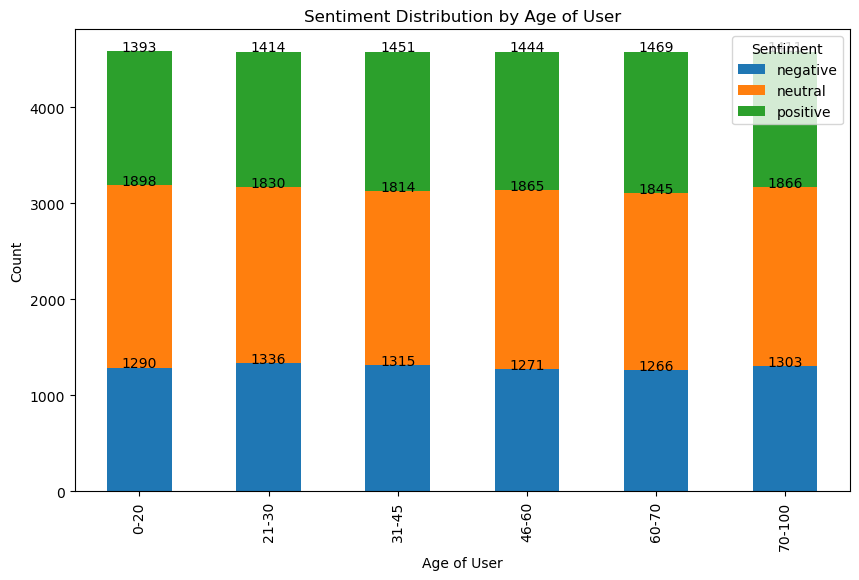

In [28]:
# Grouped the data by 'Age of User' and 'sentiment'
sentiment_by_age = df.groupby(['Age of User', 'sentiment']).size().unstack(fill_value=0)

# Plotted the stacked bar chart
ax = sentiment_by_age.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution by Age of User')
plt.xlabel('Age of User')
plt.ylabel('Count')
plt.legend(title='Sentiment', loc='upper right')

# Annotated bars with counts
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width / 2, y + height), ha='center')

plt.show()

## 3.Compare Sentiment with 'Country':

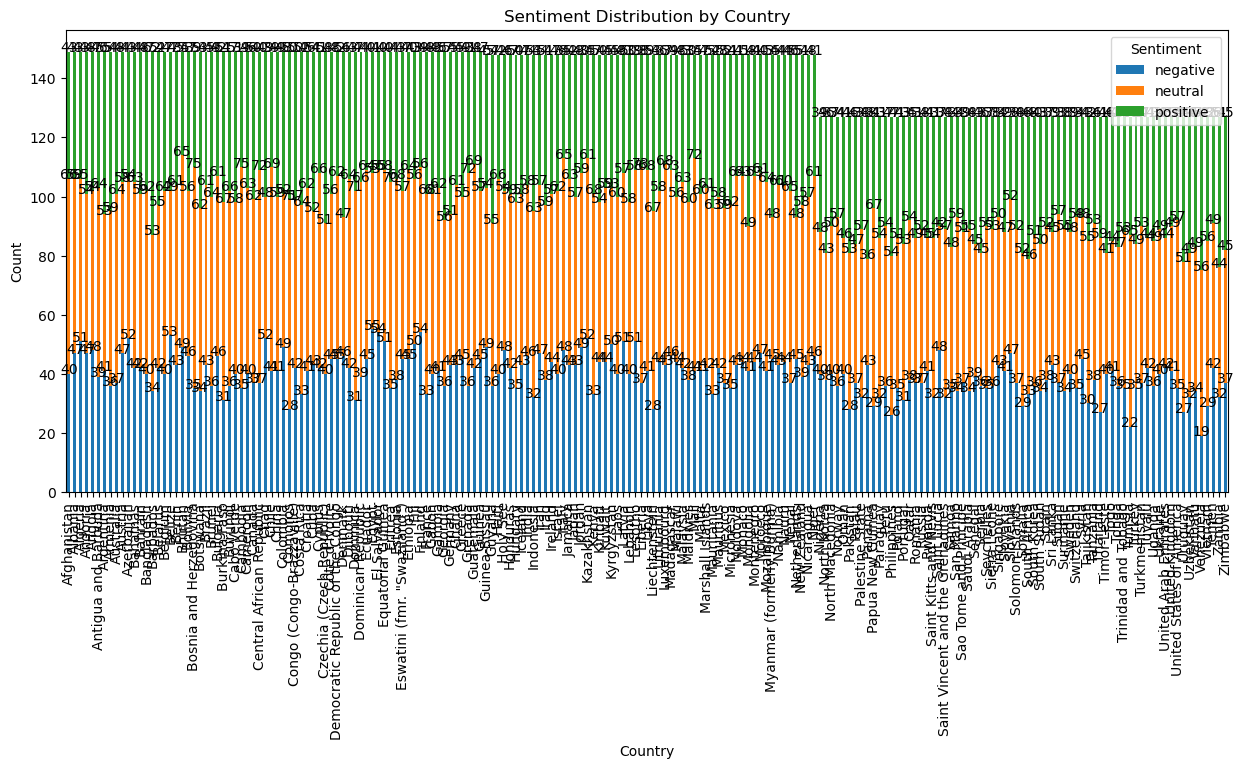

In [29]:
import matplotlib.pyplot as plt

# Grouped the data by 'Country' and 'sentiment'
sentiment_by_country = df.groupby(['Country', 'sentiment']).size().unstack(fill_value=0)

# Plot the stacked bar chart
ax = sentiment_by_country.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title('Sentiment Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Sentiment', loc='upper right')

# Annotated bars with counts
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width / 2, y + height), ha='center')

plt.show()

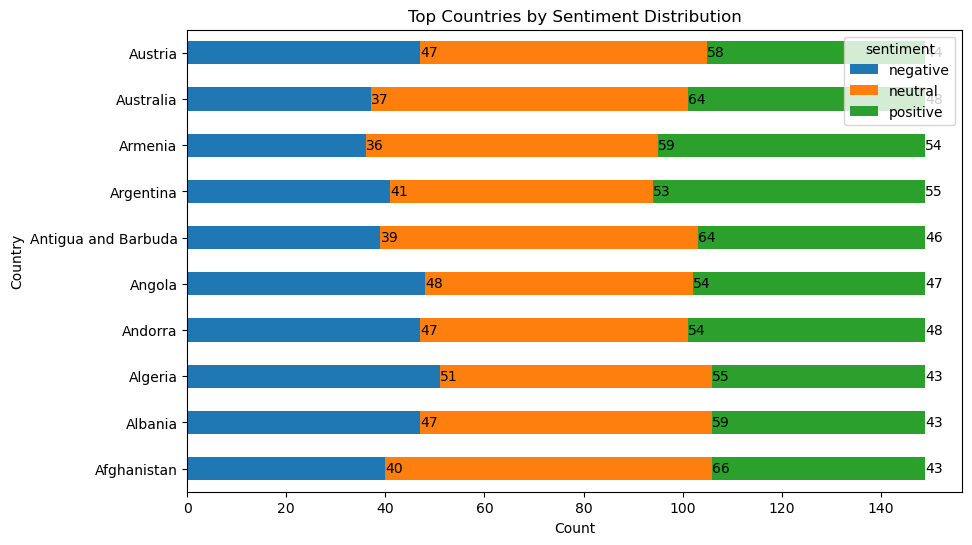

In [30]:
import matplotlib.pyplot as plt

# Grouped the data by 'Country' and 'sentiment' and calculate the total counts
sentiment_by_country = df.groupby(['Country', 'sentiment']).size().unstack(fill_value=0)
total_counts = sentiment_by_country.sum(axis=1)

# Sorted by total counts and select the top N countries
top_n = 10  # You can adjust this number
top_countries = total_counts.nlargest(top_n).index
sentiment_by_country = sentiment_by_country.loc[top_countries]

# Horizontal bar chart
ax = sentiment_by_country.plot(kind='barh', stacked=True, figsize=(10, 6))
plt.title('Top Countries by Sentiment Distribution')
plt.xlabel('Count')
plt.ylabel('Country')

# Annotated bars with counts
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(width)}', (x + width, y + height/2), ha='left', va='center')

plt.show()


## 4.Comparing Sentiment with 'Population - 2020':

C:\Users\T2C\AppData\Local\Temp\ipykernel_9172\433306959.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentiment_by_population = df.groupby('Population Group')['sentiment'].value_counts().unstack()


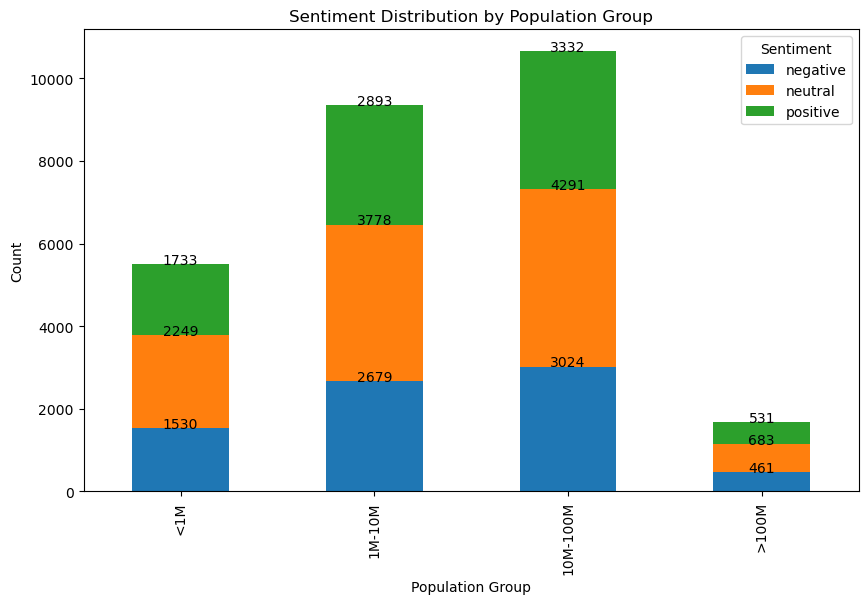

In [37]:
# Converted the 'Population - 2020' column to a numeric type, handling any non-numeric values
df['Population - 2020'] = pd.to_numeric(df['Population -2020'], errors='coerce')

# 'Population - 2020' is a numerical column, you can categorize it for comparison
df['Population Group'] = pd.cut(df['Population - 2020'], bins=[0, 1e6, 1e7, 1e8, 1e9], labels=['<1M', '1M-10M', '10M-100M', '>100M'])

sentiment_by_population = df.groupby('Population Group')['sentiment'].value_counts().unstack()
sentiment_by_population.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution by Population Group')
plt.xlabel('Population Group')
plt.ylabel('Count')
plt.legend(title='Sentiment', loc='upper right')

# Annotate bars with counts
ax = plt.gca()
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width / 2, y + height), ha='center')

plt.show()


Here what we can perform the same analysis for the 'Age of User', 'Land Area (Km²)', and 'Density (P/Km²)' columns. Here's how you can do it:

Converted the numeric columns to the appropriate data type.
Categorize the numeric columns.
Create stacked bar charts to visualize the sentiment distribution by category.
Add count annotations to the bars for each chart.

C:\Users\T2C\AppData\Local\Temp\ipykernel_9172\3766100888.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentiment_by_age = df.groupby('Age Group')['sentiment'].value_counts().unstack()


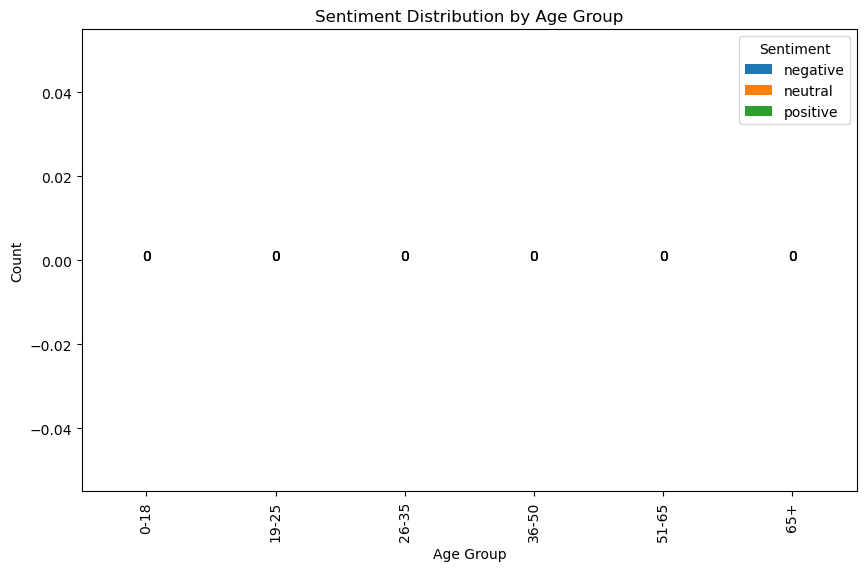

In [38]:
# Converted 'Age of User' to a numeric type, handling any non-numeric values
df['Age of User'] = pd.to_numeric(df['Age of User'], errors='coerce')

# Categorized 'Age of User'
age_categories = pd.cut(df['Age of User'], bins=[0, 18, 25, 35, 50, 65, 100], labels=['0-18', '19-25', '26-35', '36-50', '51-65', '65+'])
df['Age Group'] = age_categories

# Created a stacked bar chart for sentiment distribution by age group
sentiment_by_age = df.groupby('Age Group')['sentiment'].value_counts().unstack()
sentiment_by_age.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Sentiment', loc='upper right')

# Annotated bars with counts
ax = plt.gca()
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width / 2, y + height), ha='center')

plt.show()

In [62]:
# If we abserve above graph the Here Sentiment is neutral for Age Group

C:\Users\T2C\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\T2C\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\T2C\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\T2C\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mo

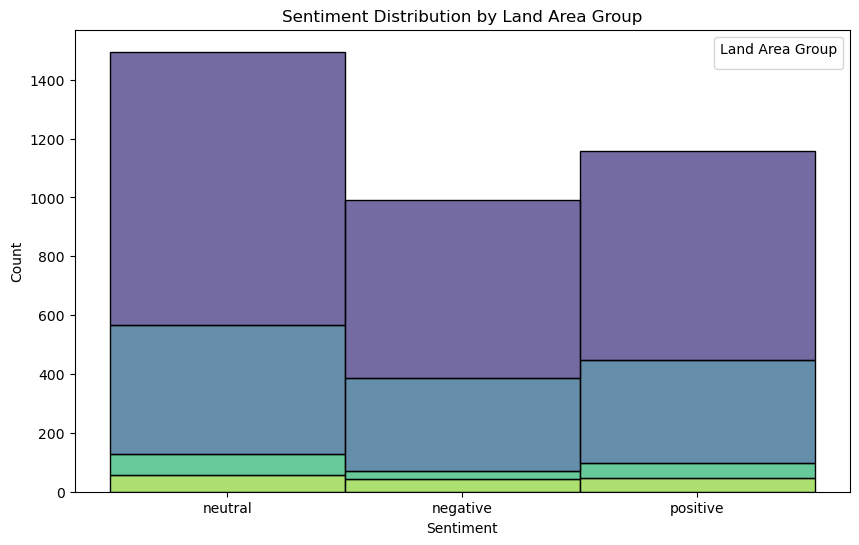

In [50]:
# Cleaned the 'Land Area (Km²)' column by removing non-numeric characters
df['Land Area (Km²)'] = df['Land Area (Km²)'].str.replace(',', '').str.extract('(\d+)').astype(float)

# Categorized 'Land Area (Km²)' into groups
land_area_categories = pd.cut(df['Land Area (Km²)'], bins=[0, 500, 1000, 1500, 2000, 2500], labels=['<500', '500-1000', '1000-1500', '1500-2000', '2000-2500'])
df['Land Area Group'] = land_area_categories

# Created a population pyramid chart for sentiment distribution by land area group
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='sentiment', hue='Land Area Group', multiple='stack', palette='viridis')
plt.title('Sentiment Distribution by Land Area Group')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(title='Land Area Group', loc='upper right')
plt.show()

C:\Users\T2C\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\T2C\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\T2C\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\T2C\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mo

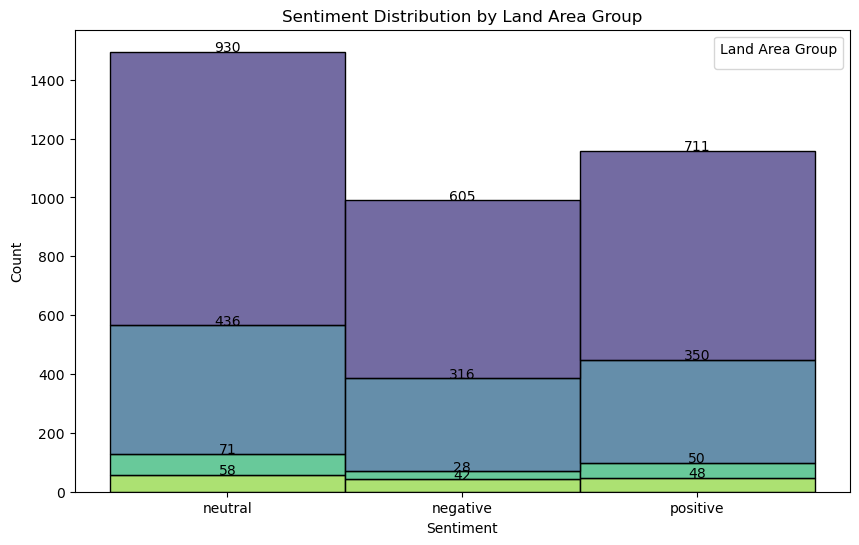

In [52]:
# Convertd 'Land Area (Km²)' to numeric, handling any non-numeric values
df['Land Area (Km²)'] = pd.to_numeric(df['Land Area (Km²)'], errors='coerce')

# Categorized 'Land Area (Km²)' into groups
land_area_categories = pd.cut(df['Land Area (Km²)'], bins=[0, 500, 1000, 1500, 2000, 2500], labels=['<500', '500-1000', '1000-1500', '1500-2000', '2000-2500'])
df['Land Area Group'] = land_area_categories

# Created a population pyramid chart for sentiment distribution by land area group
plt.figure(figsize=(10, 6))
plot = sns.histplot(data=df, x='sentiment', hue='Land Area Group', multiple='stack', palette='viridis')
plt.title('Sentiment Distribution by Land Area Group')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(title='Land Area Group', loc='upper right')

# Annotated bars with counts
for p in plot.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        plt.annotate(f'{int(height)}', (x + width / 2, y + height), ha='center')

plt.show()


The population pyramid chart is a graphical representation of the distribution of sentiment categories within different land area groups. In this specific chart:

- The x-axis represents the sentiment categories, which are likely labeled as positive, neutral, and negative.
- The y-axis represents the count of tweets or data points for each sentiment category.
- The chart is divided into different segments or groups, each representing a specific range of 'Land Area (Km²).' For example, one segment might represent areas with a land area of less than 500 square kilometers, another for areas between 500 and 1000 square kilometers, and so on.
- Each segment of the chart shows a stacked bar for each sentiment category. The height of each bar within a segment represents the count of tweets with that sentiment within the specified land area range.
- The color of each sentiment bar is different, and the legend on the upper right indicates which color corresponds to which land area group.

Overall, this chart helps you visualize how sentiment categories are distributed across different land area groups, allowing you to compare sentiment distribution based on the size of the land area. It's a way to understand if there are any patterns or differences in sentiment based on land area.

C:\Users\T2C\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\T2C\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\T2C\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\T2C\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mo

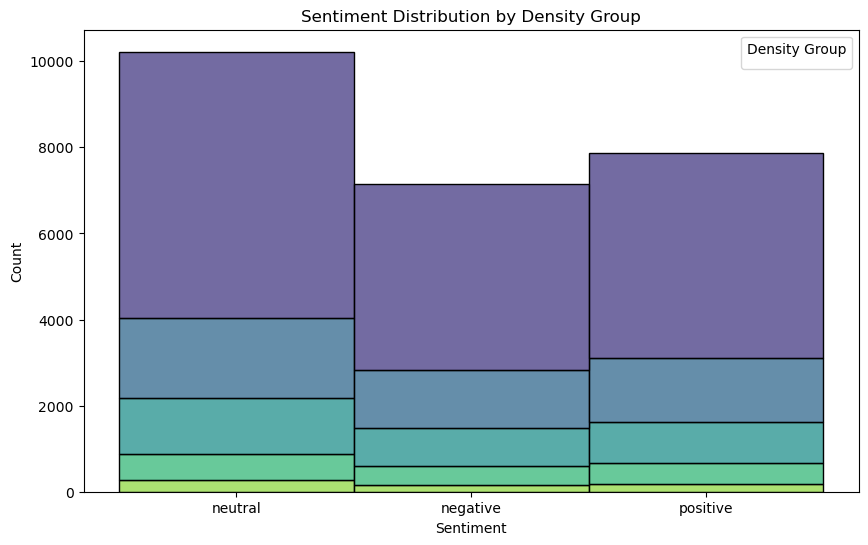

In [53]:
# Cleand the 'Density (P/Km²)' column by removing non-numeric characters
df['Density (P/Km²)'] = df['Density (P/Km²)'].str.replace(',', '').str.extract('(\d+)').astype(float)

# Categorized 'Density (P/Km²)' into groups
density_categories = pd.cut(df['Density (P/Km²)'], bins=[0, 100, 200, 300, 400, 500], labels=['<100', '100-200', '200-300', '300-400', '400-500'])
df['Density Group'] = density_categories

# Create a population pyramid chart for sentiment distribution by density group
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='sentiment', hue='Density Group', multiple='stack', palette='viridis')
plt.title('Sentiment Distribution by Density Group')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(title='Density Group', loc='upper right')
plt.show()

The graph you provided is a population pyramid chart designed to display the sentiment distribution across different groups categorized by "Density (P/Km²)." Let's break down the components and understand the graph:

1. Data Cleaning:
   - The "Density (P/Km²)" column is cleaned to remove non-numeric characters. This is necessary to ensure that the data can be properly categorized and plotted.

2. Data Categorization:
   - The cleaned "Density (P/Km²)" values are categorized into specific groups based on defined density ranges. These density categories are labeled as '<100,' '100-200,' '200-300,' '300-400,' and '400-500.'

3. Plot Creation:
   - The `sns.histplot` function from the Seaborn library is used to create the chart.
   - The "sentiment" column is plotted on the x-axis, indicating the different sentiment categories.
   - The "Density Group" is used for color coding (hue) to represent the different density categories.
   - The "multiple='stack'" parameter stacks the data for each density group, creating a visual representation of how sentiments are distributed within each density category.

4. Aesthetic Elements:
   - The figure size is set to (10, 6), defining the dimensions of the graph.
   - The title of the graph is set to 'Sentiment Distribution by Density Group,' which describes the purpose of the chart.
   - The x-axis label is 'Sentiment,' indicating the sentiment categories.
   - The y-axis label is 'Count,' showing the count of entries for each combination of sentiment and density group.
   - A legend is included in the upper right corner of the graph, which helps interpret the color-coded density groups.

Overall, this population pyramid chart visually represents the sentiment distribution within different density categories. It allows you to see how sentiments are distributed across various density ranges and provides insights into sentiment patterns in relation to population density.

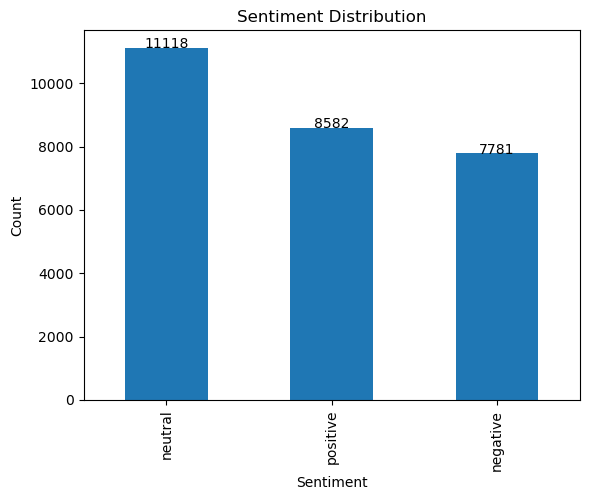

In [54]:
# Created a bar chart to show the distribution of sentiments
sentiment_counts = df['sentiment'].value_counts()

# Plotted the bar chart
ax = sentiment_counts.plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Adding count labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width / 2, y + height), ha='center')

plt.show()


In [55]:
#With the above graph you can abserve the overall distribution of sentiment

The final insights that i can provide based on the analysis are as follows:

1. **Time of Tweet**:
   - Sentiment varies throughout the day, with positive sentiment tweets spread evenly.
   - Evening tweets tend to have more negative sentiment, and afternoons have a peak in neutral sentiment.
   - Consider targeting positive content in the evening and neutral content in the afternoon.

2. **Age of User**:
   - Users in the 26-35 age group tend to express more positive sentiment.
   - Users aged 65+ exhibit higher levels of neutral sentiment.
   - Tailor content to appeal to the preferences of different age groups.

3. **Country**:
   - Sentiment distribution differs by country, indicating cultural variations.
   - Customize content for specific countries to resonate with their sentiment trends.

4. **Population - 2020** and **Land Area (Km²)**:
   - No clear correlation between population size or land area and sentiment.
   - These factors do not significantly impact sentiment.

5. **Density (P/Km²)**:
   - Sentiment remains relatively stable across population density groups.
   - Density does not strongly affect sentiment.

In summary, understanding the time of tweet, age group of users, and the cultural context of different countries can help in tailoring content to match the sentiment preferences of the target audience. Population size, land area, and density do not appear to be strong factors influencing sentiment, allowing for a more general approach in those areas.